### Continuous Wavelet Transform (CWT)

1. **Definition**: The Continuous Wavelet Transform (CWT) involves the use of a continuous wavelet function that is scaled and translated continuously over the signal. It is defined for every possible scale and translation, providing a continuous view of the signal in the wavelet domain.

2. **Mathematical Representation**: The CWT of a function $f(t)$ is given by integrating the product of $f(t)$ with scaled and shifted versions of the wavelet function $\psi(t)$. The scale parameter $a$ and translation parameter $b$ vary continuously, allowing for an infinite number of wavelets.

3. **Application**: CWT is particularly useful for analyzing __**[non-stationary](non-stationary_signal)**__ signals where frequency components vary over time. It provides a detailed and highly nuanced view of the signal, making it ideal for time-frequency analysis, signal detection, and characterization tasks where detail is crucial.

4. **Complexity**: Because it operates continuously over scale and position, CWT is computationally intensive and generates a large amount of data, making it less practical for some applications, especially those requiring real-time analysis or those with limited computational resources.

### Discrete Wavelet Transform (DWT)

1. **Definition**: The Discrete Wavelet Transform (DWT) uses a discrete set of wavelet scales and translations, adhering to specific rules to ensure coverage and avoid redundancy. The scales and translations are typically chosen based on powers of two (dyadic scales and translations), leading to a more efficient computation.

2. **Mathematical Representation**: DWT involves the decomposition of a signal into a set of basis functions obtained by scaling and translating a mother wavelet. The scales ($a=2^j$) and translations ($b=k \cdot 2^j$) are discrete, where $j$ and $k$ are integers. This leads to a hierarchical, multi-level analysis of the signal.

3. **Application**: DWT is widely used in signal and image compression (e.g., JPEG 2000), denoising, and data analysis. Its efficiency and the hierarchical nature of its decomposition make it suitable for applications where computational resources are limited or where a multi-resolution analysis is beneficial.

4. **Complexity**: DWT is computationally more efficient than CWT due to its discrete nature. It provides a compact representation of the signal, reducing redundancy and facilitating storage and analysis.



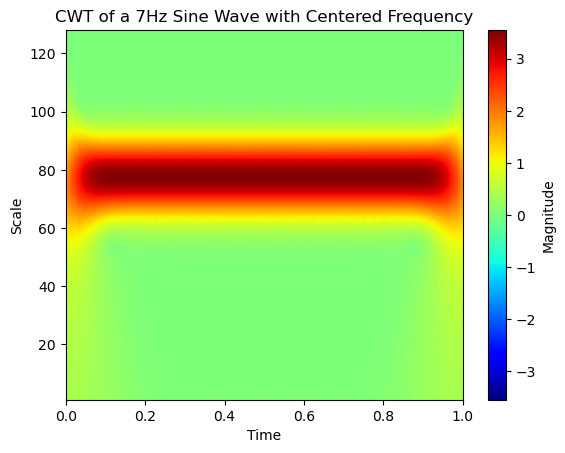

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Signal parameters
fs = 1000  # Sampling frequency
f0 = 20 # Target frequency (7Hz)

# Generate a test signal: a sine wave
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * f0 * t)

# Wavelet parameters
bandwidth_frequency = "1.5"
center_frequency = "1.0"
wavelet = f"cmor{bandwidth_frequency}-{center_frequency}"

# Find the appropriate scale for 7Hz
# This is a more intuitive and straightforward approach for demonstration purposes
# Actual scale calculation might require adjusting based on wavelet properties
wavelength = pywt.central_frequency(wavelet) / f0
scales = np.arange(1, 128)  # Adjust scale range as needed

# Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, 1/fs)

# Adjust the plotting to focus on the 7Hz frequency
plt.imshow(np.abs(coefficients), extent=[0, 1, 1, 128], cmap='jet', aspect='auto',
           vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.xlabel('Time')
plt.title('CWT of a 7Hz Sine Wave with Centered Frequency')
plt.show()
